In [1]:
import pandas as pd

# Load the CSV file to check its contents
file_path = '/content/final_merged_youtube_trending_videos.csv'
df = pd.read_csv(file_path)

# Display basic information and the first few rows to understand its structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        767 non-null    object
 1   title           767 non-null    object
 2   description     739 non-null    object
 3   published_at    767 non-null    object
 4   channel_id      767 non-null    object
 5   channel_title   767 non-null    object
 6   category_id     767 non-null    int64 
 7   tags            767 non-null    object
 8   duration        767 non-null    object
 9   definition      767 non-null    object
 10  caption         767 non-null    bool  
 11  view_count      767 non-null    int64 
 12  like_count      767 non-null    int64 
 13  dislike_count   767 non-null    int64 
 14  favorite_count  767 non-null    int64 
 15  comment_count   767 non-null    int64 
 16  category_name   767 non-null    object
 17  comments        767 non-null    object
 18  fetch_date

(None,
       video_id                                              title  \
 0  UUNCGURWXl0  Walmik Karad अखेर पुण्यात सरेंडर, कराडसाठी आले...   
 1  OgCdsfChAd4  2025 New Year Rasipalan | Astrology | எப்படி இ...   
 2  pme2zsax3eU  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...   
 3  h-tH2sCdOnQ  Baakiyalakshmi | 31st December 2024 to 4th Jan...   
 4  Az38f7cUzK8            School | Aakash Gupta | Stand-up Comedy   
 
                                          description          published_at  \
 0  #MumbaiTakNews  #LatestMarathiNews #Maharashtr...  2024-12-31T09:18:41Z   
 1  #rasipalan2025 #horoscope #suntv   #rasipalan ...  2025-01-01T02:19:18Z   
 2  Jio..Airtel ಸಿಮ್ ಬಳಕೆದಾರರಿಗೆ ಸಿಹಿ ಸುದ್ದಿ..! । ...  2024-12-31T10:21:24Z   
 3  பாக்கியலட்சுமி - திங்கள் முதல் சனி இரவு 8:30 ம...  2024-12-31T13:30:31Z   
 4  India US & UK Tour 2025 Tickets Link : https:/...  2024-12-28T16:04:03Z   
 
                  channel_id     channel_title  category_id  \
 0  UCQ2W9GCHctD59vQpvLKVg3g    

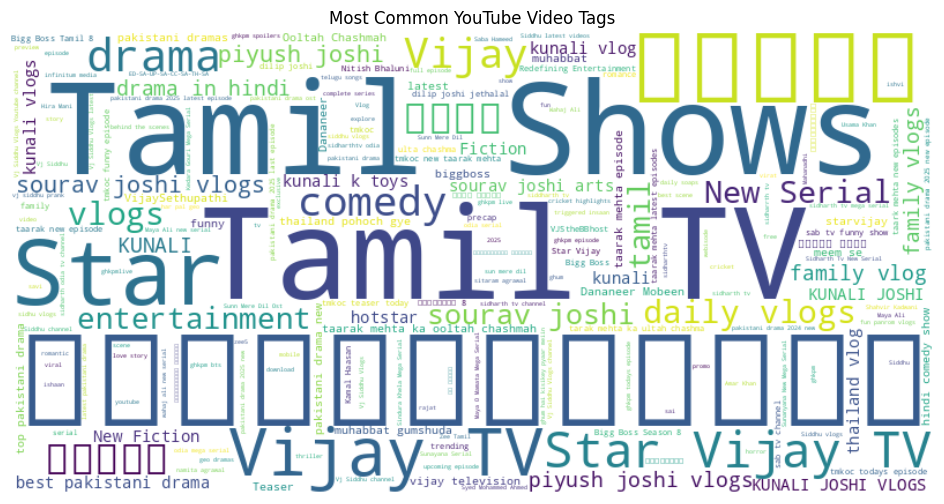

[('தொலைக்காட்சி', 51),
 ('Tamil TV', 51),
 ('Tamil Shows', 51),
 ('தமிழ்', 49),
 ('Star', 49),
 ('Vijay TV', 49),
 ('Star Vijay TV', 49),
 ('drama', 39),
 ('விஜய்', 32),
 ('டிவி', 32)]

In [2]:
import ast
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the tags column from string to list
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Flatten the list of all tags
all_tags = [tag for tags in df['tags'] for tag in tags]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Create a word cloud of the most common tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common YouTube Video Tags')
plt.show()

# Show the 10 most common tags
tag_counts.most_common(10)


In [3]:
# Group tags by category
category_tags = df.groupby('category_name')['tags'].sum()

# Create word clouds for each category
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 20))
axes = axes.flatten()

for i, (category, tags) in enumerate(category_tags.items()):
    if len(tags) > 0:
        tag_counts = Counter(tags)
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(tag_counts)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(category, fontsize=14)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Create a new dataframe with tag counts per category
tag_stats = category_tags.apply(lambda tags: Counter(tags))

# Convert to DataFrame format for easier analysis
tag_stats_df = pd.DataFrame([{**{'category': cat}, **dict(tags)} for cat, tags in tag_stats.items()]).set_index('category').fillna(0)

# Summary statistics
summary_stats = tag_stats_df.describe().T

summary_stats


,count,mean,std,min,25%,50%,75%,max
motoroctane,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
motor octane,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
tata seirra,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
Seirra,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
Tata Seirra Petrol,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
janhvi kapoor,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
loveyapa khushi kapoor,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
khushi kapoor and vedang raina,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0
khushi kapoor bf,14.0,0.071429,0.267261,0.0,0.0,0.0,0.0,1.0


In [7]:
#pip install isodate

In [8]:
from datetime import datetime
import isodate

# Convert 'duration' from ISO 8601 to seconds
def convert_duration_to_seconds(duration_str):
    try:
        duration = isodate.parse_duration(duration_str)
        return int(duration.total_seconds())
    except:
        return None

df['duration_seconds'] = df['duration'].apply(convert_duration_to_seconds)

# Convert 'published_at' to datetime and extract useful features
df['published_at'] = pd.to_datetime(df['published_at'])
df['published_hour'] = df['published_at'].dt.hour
df['published_dayofweek'] = df['published_at'].dt.dayofweek

# Convert 'fetch_date' to datetime format
df['fetch_date'] = pd.to_datetime(df['fetch_date'], errors='coerce')

# Check the new columns and their data types
df[['duration_seconds', 'published_hour', 'published_dayofweek', 'fetch_date']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   duration_seconds     767 non-null    int64         
 1   published_hour       767 non-null    int32         
 2   published_dayofweek  767 non-null    int32         
 3   fetch_date           767 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 18.1 KB


In [20]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['duration_seconds', 'view_count', 'like_count', 'dislike_count',
            'favorite_count', 'comment_count', 'published_hour', 'published_dayofweek','category_id']

# Extract the relevant features
X = df[features]

# Scale the numerical features (excluding 'category_id')
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled.iloc[:, :-1] = scaler.fit_transform(X.iloc[:, :-1])  # Scaling all columns except the last one ('category_id')

# Display the first few rows of the scaled data
X_scaled.head()


<ipython-input-20-ef2b2dc6c0a3>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.37576753e-01  9.57789862e-01 -4.05894223e-01 -4.55874929e-01
  3.56443060e-01 -5.18203849e-02  2.45959396e-01  1.60729141e-01
 -4.59031605e-01 -1.54412359e-01 -3.85901941e-01 -3.26977320e-01
 -3.87480279e-01 -1.31789513e-01 -3.51704617e-01  1.21796802e-01
 -1.11797231e-01  1.11036254e+00  1.14957337e-01  1.55994127e-01
 -3.80114702e-01 -9.44355125e-02 -9.49616252e-02  2.22284325e-01
 -4.12981311e-02  3.25928525e-01  2.78578383e-01  6.43700588e-01
  1.07037798e+00  1.48628549e-01 -4.36934872e-01 -1.56516810e-01
  6.18973291e-01 -4.59031605e-01 -4.37987097e-01 -4.55874929e-01
  2.57007763e-01  1.44945760e-01 -2.93832221e-01 -4.56401041e-01
  5.21642444e-01 -2.38590389e-01 -1.93870810e-01 -1.46520669e-01
  9.18083788e-02 -1.58095148e-01 -6.97082162e-02 -4.34025819e-02
  2.48589960e-01  1.80195310e-01 -3.67487997e-01  1.03302398e+00
 

,duration_seconds,view_count,like_count,dislike_count,favorite_count,comment_count,published_hour,published_dayofweek,category_id
0,-0.137577,-0.213564,-0.413260,0,0,-0.095107,-0.160040,-0.987443,25
1,0.957790,-0.317064,-0.395988,0,0,-0.234855,-1.585008,-0.467986,25
2,-0.405894,-0.346350,-0.431813,0,0,-0.262956,0.043527,-0.987443,25
3,-0.455875,0.010863,-0.162337,0,0,-0.226902,0.654227,-0.987443,24
4,0.356443,0.288407,1.172723,0,0,0.112735,1.264928,1.090386,23


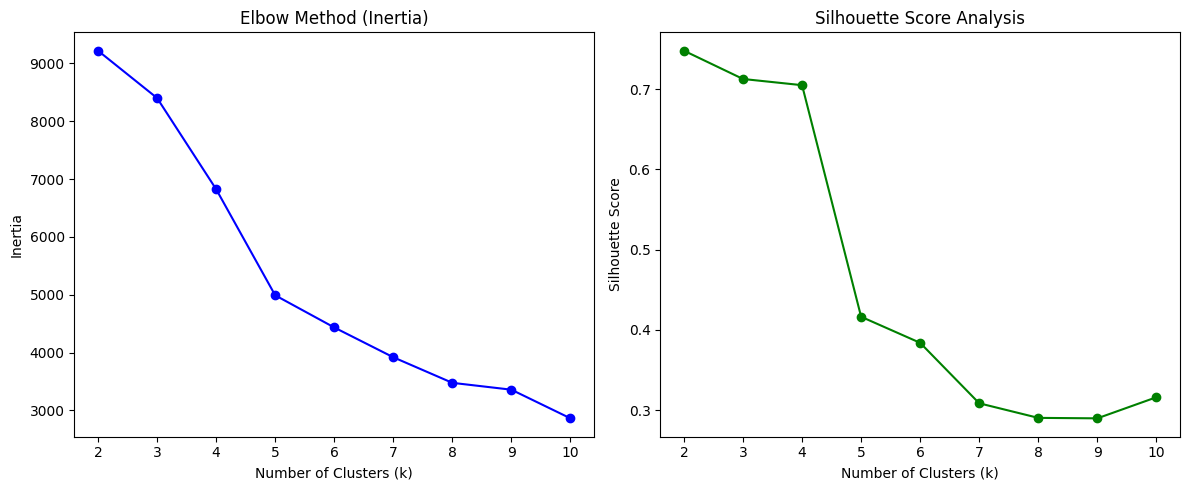

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of clusters to try
cluster_range = range(2, 11)
inertia = []  # For Elbow Method
silhouette_scores = []  # For Silhouette Score

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Record the inertia (sum of squared distances to the closest cluster center)
    inertia.append(kmeans.inertia_)

    # Record the silhouette score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [22]:
import seaborn as sns

# Function to perform K-means clustering and return labels & silhouette score
def perform_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    return labels, score

# Perform clustering with 3 and 4 clusters
labels_3, score_3 = perform_kmeans(3)
labels_4, score_4 = perform_kmeans(4)
labels_2, score_2 = perform_kmeans(2)
# Add labels to the original dataframe for comparison
df['Cluster_3'] = labels_3
df['Cluster_4'] = labels_4
df['Cluster_2'] = labels_2

# Display silhouette scores for comparison
score_3, score_4, score_2


(np.float64(0.7126722949509711),
 np.float64(0.7049550909604753),
 np.float64(0.7478981930437726))

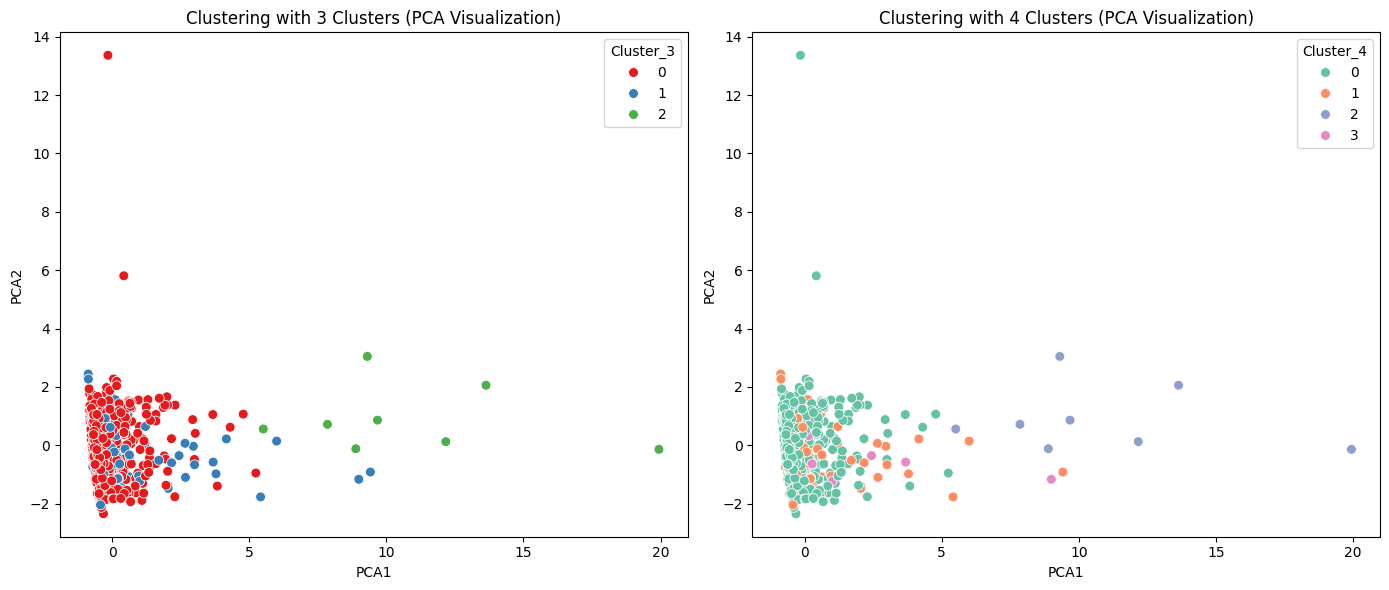

In [23]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled.iloc[:, :-1])  # Exclude 'category_id' from PCA

# Add PCA components to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plotting the clusters for both 3 and 4 clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_3', data=df, palette='Set1', s=50)
plt.title('Clustering with 3 Clusters (PCA Visualization)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_4', data=df, palette='Set2', s=50)
plt.title('Clustering with 4 Clusters (PCA Visualization)')

plt.tight_layout()
plt.show()


In [24]:
# Calculating the mean of each feature for each cluster
cluster_3_summary = df.groupby('Cluster_3')[features].mean()
cluster_4_summary = df.groupby('Cluster_4')[features].mean()

cluster_3_summary, cluster_4_summary


(           duration_seconds    view_count    like_count  dislike_count  \
 Cluster_3                                                                
 0                981.030675  1.801976e+06  5.293181e+04            0.0   
 1                415.794393  4.581476e+06  9.647304e+04            0.0   
 2               1491.000000  4.069664e+07  1.118260e+06            0.0   
 
            favorite_count  comment_count  published_hour  published_dayofweek  \
 Cluster_3                                                                       
 0                     0.0     2231.08589       10.004601             2.950920   
 1                     0.0     6536.82243        8.485981             2.588785   
 2                     0.0    81316.12500        9.375000             3.000000   
 
            category_id  
 Cluster_3               
 0            23.466258  
 1             7.831776  
 2            21.250000  ,
            duration_seconds    view_count    like_count  dislike_count  \
 Clus

In [19]:
# Function to predict cluster labels for new videos
def predict_new_videos(new_data):
    # Scale the new data (ignoring 'category_id')
    new_data_scaled = new_data.copy()
    new_data_scaled.iloc[:, :-1] = scaler.transform(new_data.iloc[:, :-1])

    # Predict labels using the 4-cluster model
    kmeans_4 = KMeans(n_clusters=4, random_state=42)
    kmeans_4.fit(X_scaled)  # Refit to ensure same training process
    labels = kmeans_4.predict(new_data_scaled)

    return labels

